<center >
Course: Topological Data Analysis
</center>


<center >
Name: Darix SAMANI SIEWE
</center>

In [2]:
import gudhi 
import numpy as np
import networkx as nx

In [3]:
def PrintSimplices(simpcomplex):
    '''
    Print a list of the simplices of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        PrintSimplices(simpcomplex)
    '''
    simplices = {i:[] for i in range(simpcomplex.dimension()+1)}
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        simplices[len(simplex)-1].append(simplex)
    print('The simplicial complex contains the following simplices: ')
    for i in range(simpcomplex.dimension()+1):
        print('Dimension '+repr(i)+': ', end="")
        print(*simplices[i], sep = ", ")
        
def DrawSimplicialComplex(simpcomplex, pos=None):
    '''
    Draw the 1-skeleton of the simplicial complex 'simpcomplex', in the plane.
    If 'pos==None', the position of the vertices are chosen at random, according to the 'spring_layout' of networkx.
    If pos is a dict 
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        pos: a dict {(vertex of simpcomplex): (list of floats of length 2) }
        
    Example 1:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        DrawSimplicialComplex(simpcomplex)

    Example 2:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        pos = {0:[0,0], 1:[0,1]}
        DrawSimplicialComplex(simpcomplex, pos=pos)
    '''
    nodes=[]; edges=[]
    for filtr in simpcomplex.get_skeleton(1):
        simplex = filtr[0]
        if len(simplex)==1:
            nodes.append(simplex[0])
        if len(simplex)==2:
            edges.append(simplex)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    if pos == None:
        pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_color='magenta')
    
def NumberOfConnectedComponents(simpcomplex, verbose = 'True'):
    '''
    Print the number of connected components of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        NumberOfConnectedComponents(simpcomplex)
    '''    
    simpcomplex.compute_persistence()
    nbr_components = simpcomplex.betti_numbers()[0]
    # if verbose: print('The simplicial complex admits '+repr(nbr_components)+' connected component(s).')
    return nbr_components

def EulerCharacteristic(simpcomplex, verbose = 'True'):
    '''
    Print the Euler characteristic of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        EulerCharacteristic(simpcomplex)
    '''
    num_simplices = [0 for i in range(simpcomplex.dimension()+1)]
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        num_simplices[len(simplex)-1]+=1
    Euler_characteristic = sum(num_simplices[::2]) - sum(num_simplices[1::2])
    if verbose: print('The simplicial complex has Euler characteristic equal to '+repr(Euler_characteristic)+'.')
    return Euler_characteristic

## Triangulation of the circle

We start by considering a simplicial complex $S$ that is a triangulation of the circle.
It is given by:
- three vertices: $0$,$1$ and $2$,
- three edges: $[0,1]$, $[1,2]$ and $[2,0]$.


In [3]:
# We build a SimplexTree structure on gudhi

simpcomplex = gudhi.SimplexTree()
print(simpcomplex)

In [4]:
# We add the vertices

simpcomplex.insert([0])
simpcomplex.insert([1])
simpcomplex.insert([2])

True

In [5]:
# Let us verify that the vertices are correctly added

PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]


In [6]:
# We add the edges

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])

True

In [7]:
# Let us verify that the edges are correctly added

PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


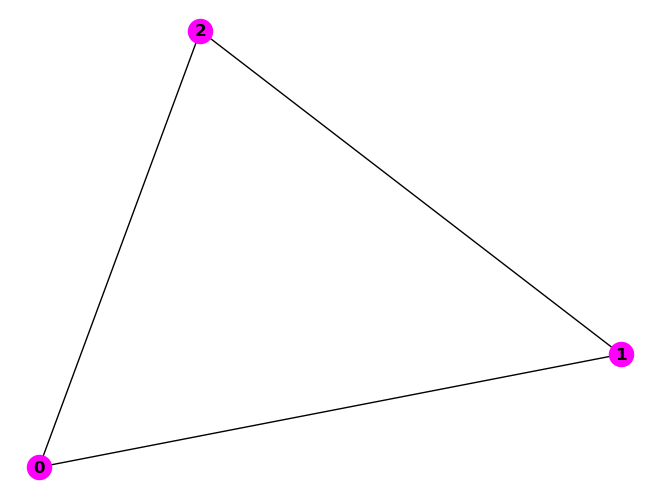

In [8]:
# The following function allows to draw the simplicial complex (uses the library networkx)

DrawSimplicialComplex(simpcomplex)

In [9]:
# In Gudhi, if a simplex is added to the complex, then all its faces are
# Hence we can use the simpler code:

simpcomplex2 = gudhi.SimplexTree()

simpcomplex2.insert([0,1])
simpcomplex2.insert([1,2])
simpcomplex2.insert([2,0])

PrintSimplices(simpcomplex2)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [10]:
# We can do it even faster, by using the remove_maximal_simplex function:

simpcomplex3 = gudhi.SimplexTree()

simpcomplex3.insert([0,1,2])
simpcomplex3.remove_maximal_simplex([0,1,2])

PrintSimplices(simpcomplex3)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [11]:
# be careful

#simpcomplex3.remove_maximal_simplex([0])

## Computing topological invariants

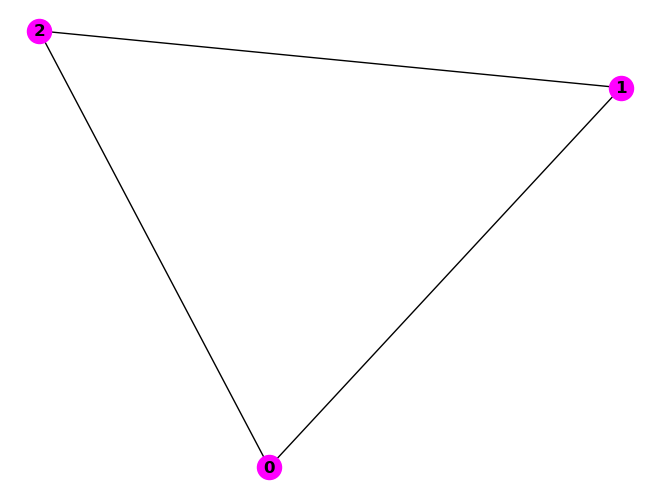

In [12]:
simpcomplexdim2 = gudhi.SimplexTree()

simpcomplexdim2.insert([0,1,2])

DrawSimplicialComplex(simpcomplexdim2)

In [13]:
# The following function returns the number of connected components of the complex.
# Use verbose = 'True' or verbose = 'False' to print the output sentence.

NumberOfConnectedComponents(simpcomplex, verbose = False)

1

In [14]:
# The following function returns the Euler characteristic of the complex.
# Use verbose = 'True' or verbose = 'False' to print the output sentence.

EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 0.


0

# Exercise 22

Build triangulations of the alphabet letters, and compute their Euler characteristic.

Given two letters that are homotopy equivalent, is it true thar their Euler characteristic are equal?
Given two letters that are not homotopy equivalent, is it true thar their Euler characteristic are different?

 #### Triangulation of the letter A

The simplicial complex has Euler characteristic equal to 0.


0

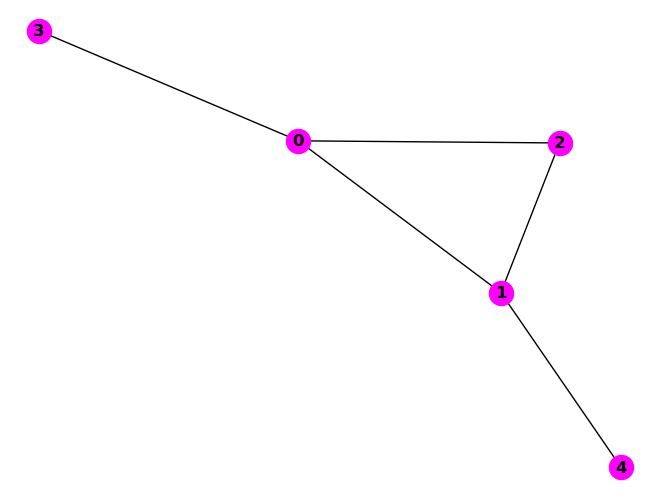

In [15]:
# We build a triangulation of the letter A

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])
simpcomplex.insert([3,0])
simpcomplex.insert([4,1])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

 #### Triangulation of the letter B

The simplicial complex has Euler characteristic equal to 0.


0

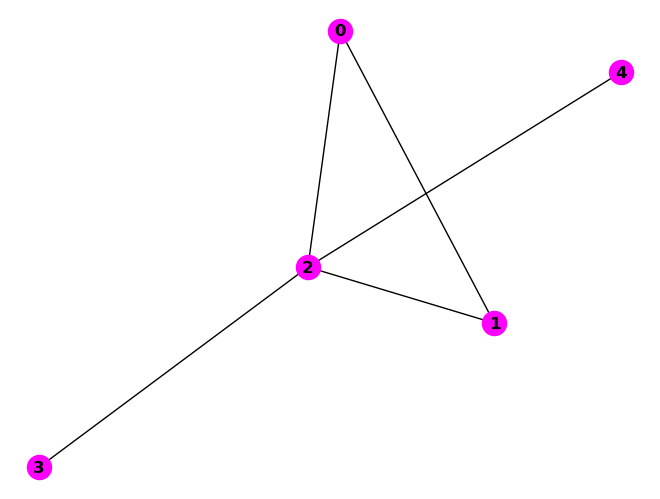

In [16]:
# We build a triangulation of the letter B

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([0,2])
simpcomplex.insert([2,3])
simpcomplex.insert([2,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter C

The simplicial complex has Euler characteristic equal to 1.


1

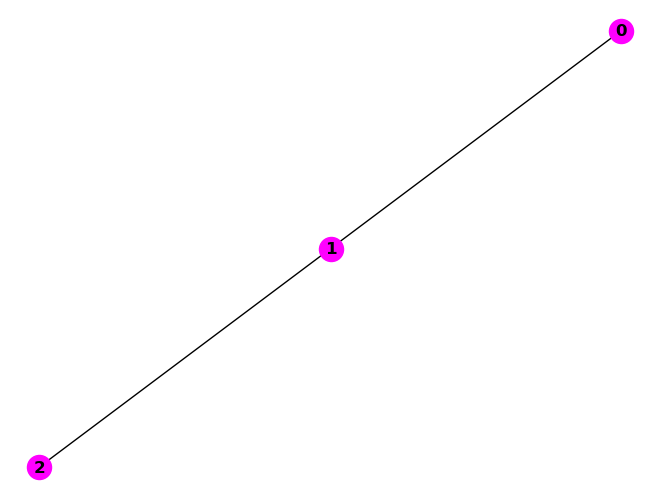

In [17]:
# We build a triangulation of the letter C

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter D

The simplicial complex has Euler characteristic equal to 0.


0

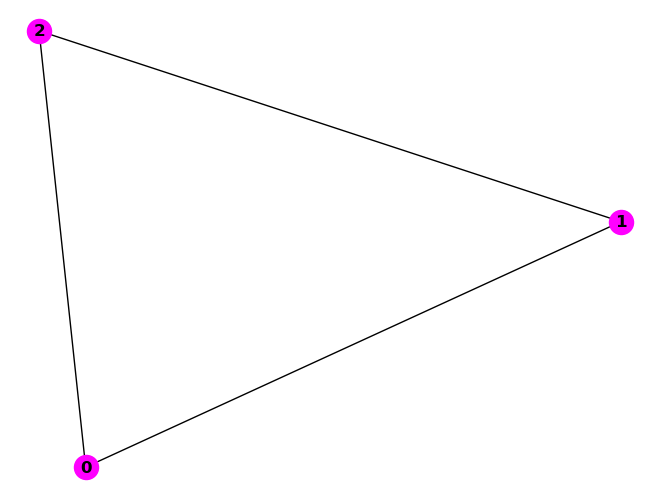

In [18]:
# We build a triangulation of the letter D

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([0,2])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter E

The simplicial complex has Euler characteristic equal to 1.


1

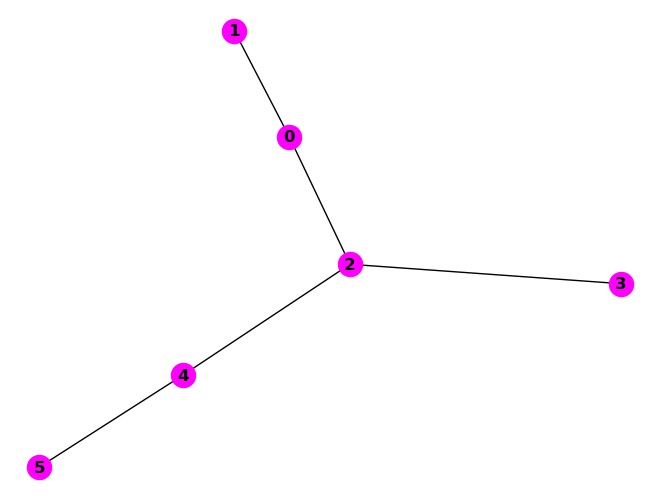

In [19]:
# We build a triangulation of the letter E

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([0,2])
simpcomplex.insert([2,3])
simpcomplex.insert([2,4])
simpcomplex.insert([4,5])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter F

The simplicial complex has Euler characteristic equal to 1.


1

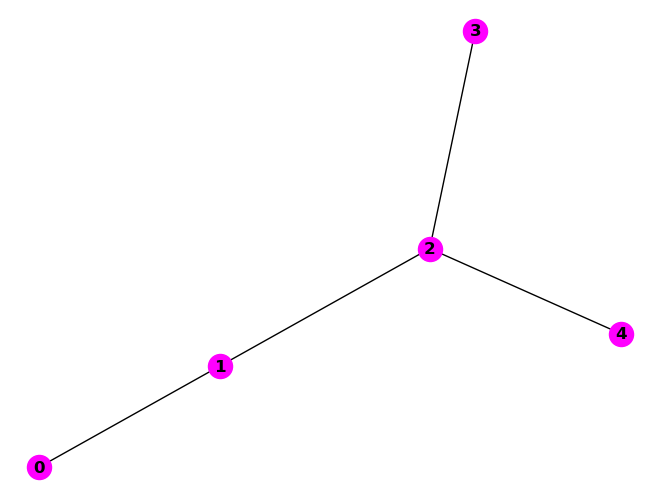

In [20]:
# We build a triangulation of the letter F

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,3])
simpcomplex.insert([2,4])


DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter G

The simplicial complex has Euler characteristic equal to 1.


1

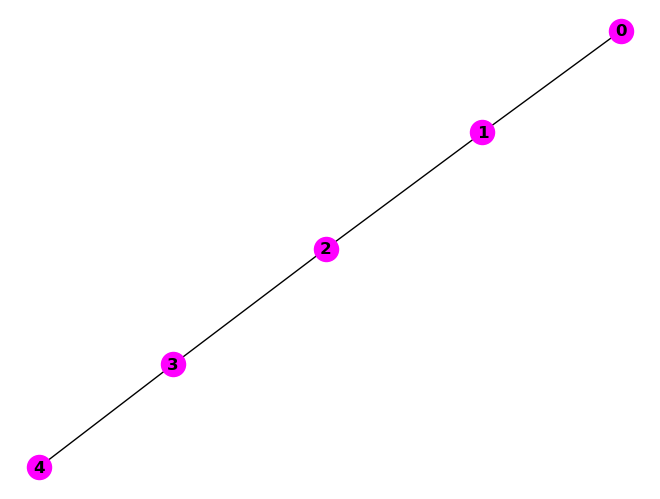

In [21]:
# We build a triangulation of the letter G

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,3])
simpcomplex.insert([3,4])


DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter H

The simplicial complex has Euler characteristic equal to 1.


1

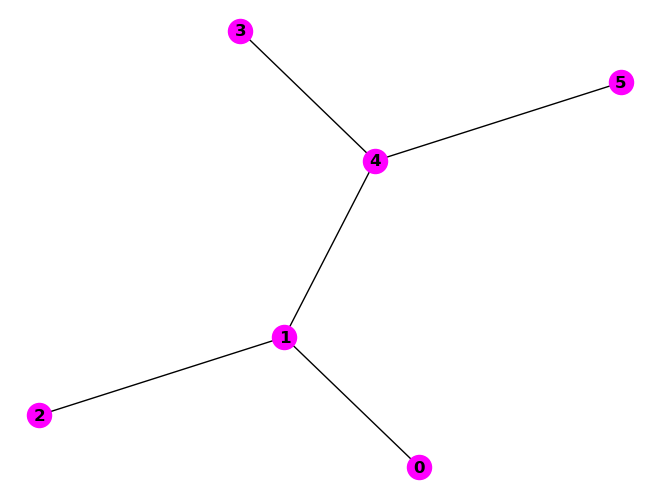

In [22]:
# We build a triangulation of the letter H

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([1,4])
simpcomplex.insert([4,5])
simpcomplex.insert([4,3])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter I

The simplicial complex has Euler characteristic equal to 1.


1

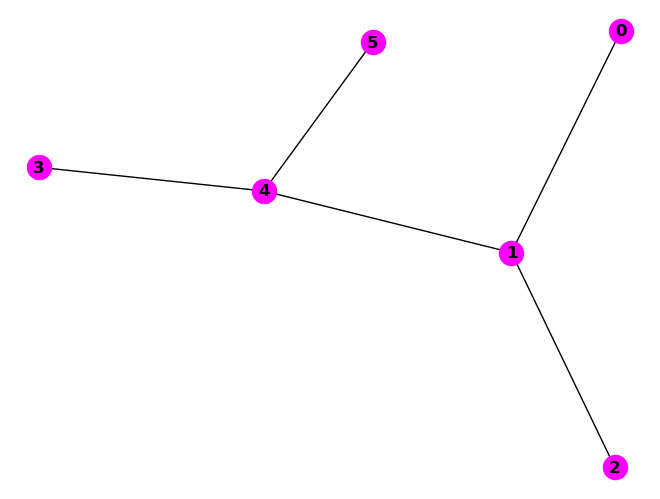

In [23]:
# We build a triangulation of the letter I

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([5,4])
simpcomplex.insert([4,3])
simpcomplex.insert([1,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter J

The simplicial complex has Euler characteristic equal to 1.


1

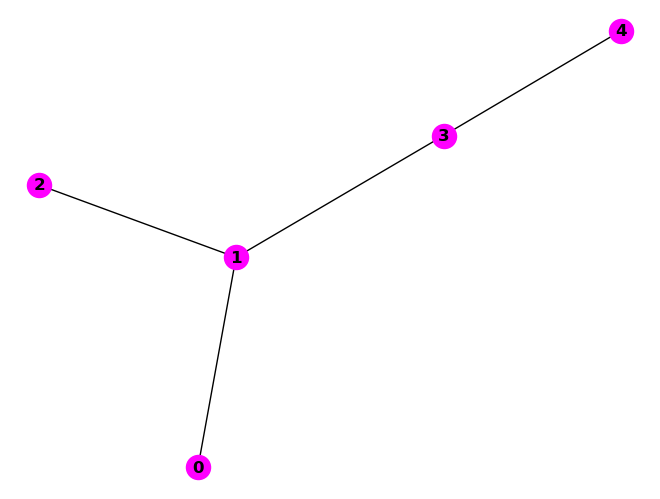

In [24]:
# We build a triangulation of the letter J

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([1,3])
simpcomplex.insert([4,3])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter K

The simplicial complex has Euler characteristic equal to 1.


1

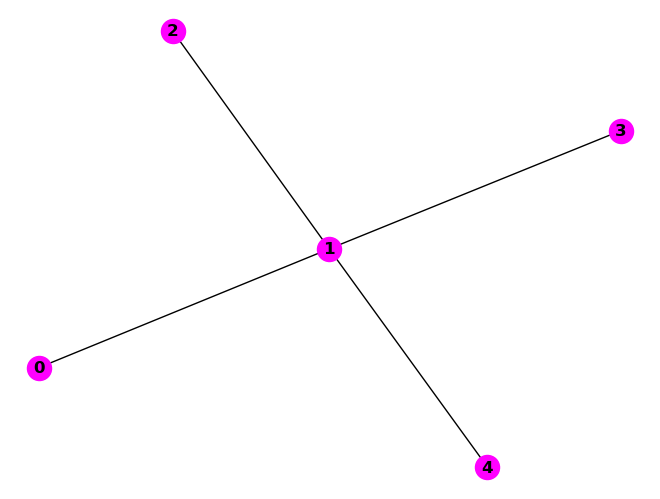

In [25]:
# We build a triangulation of the letter K

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([1,3])
simpcomplex.insert([1,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter L

The simplicial complex has Euler characteristic equal to 1.


1

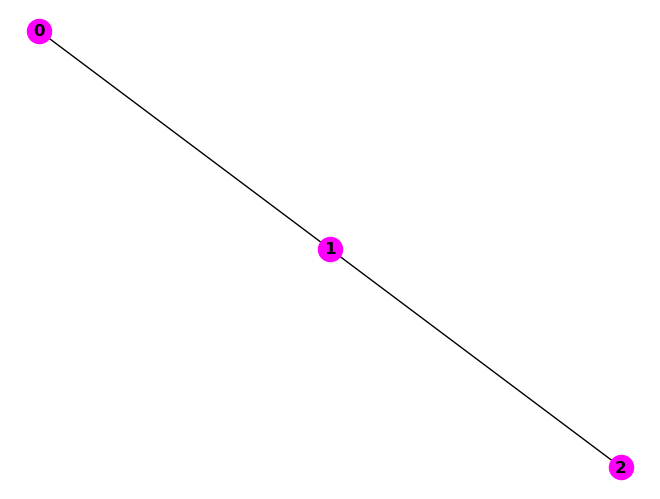

In [26]:
# We build a triangulation of the letter L

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter M

The simplicial complex has Euler characteristic equal to 1.


1

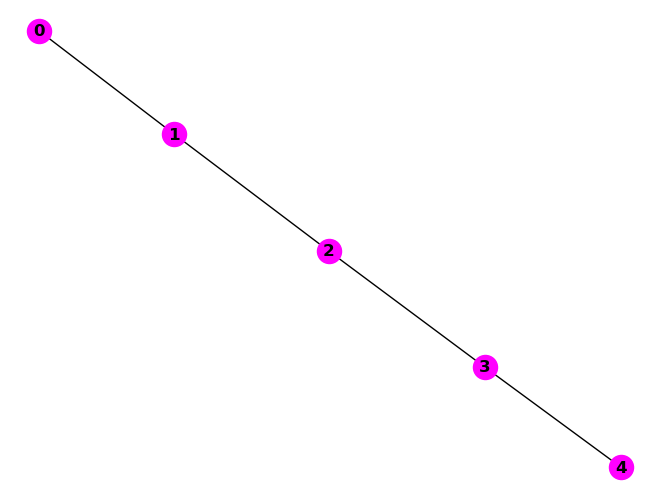

In [27]:
# We build a triangulation of the letter M

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,3])
simpcomplex.insert([3,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter N

The simplicial complex has Euler characteristic equal to 1.


1

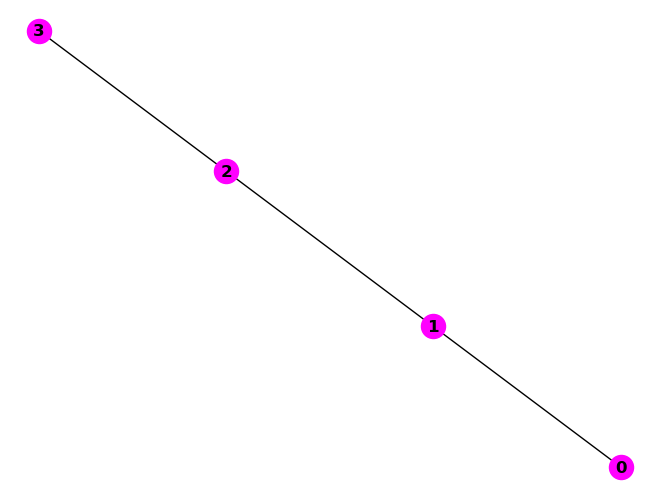

In [28]:
# We build a triangulation of the letter N

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,3])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter O

The simplicial complex has Euler characteristic equal to 0.


0

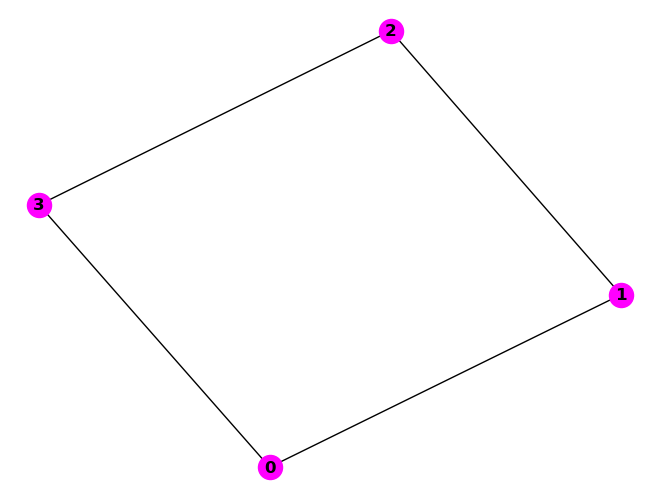

In [17]:
# We build a triangulation of the letter O

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([0,3])
simpcomplex.insert([1,2])
simpcomplex.insert([2,3])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter P

The simplicial complex has Euler characteristic equal to 1.


1

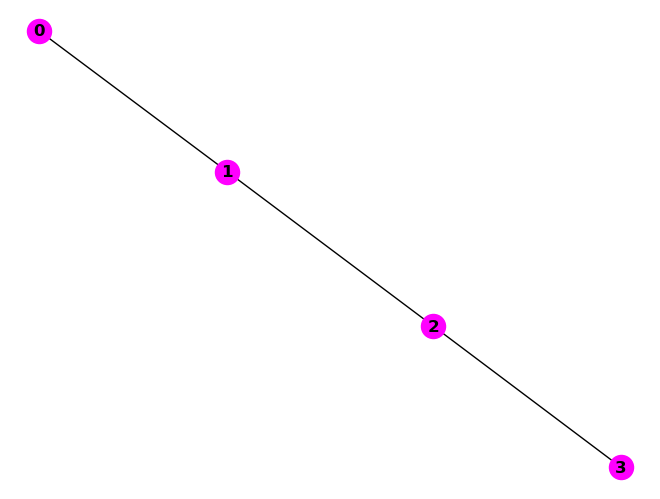

In [30]:
# We build a triangulation of the letter P

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,3])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter Q

The simplicial complex has Euler characteristic equal to 0.


0

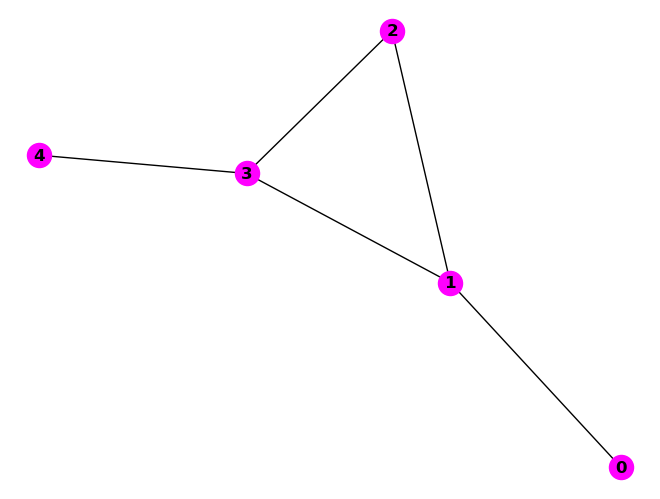

In [31]:
# We build a triangulation of the letter Q

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([1,3])
simpcomplex.insert([3,2])
simpcomplex.insert([3,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter R

The simplicial complex has Euler characteristic equal to 0.


0

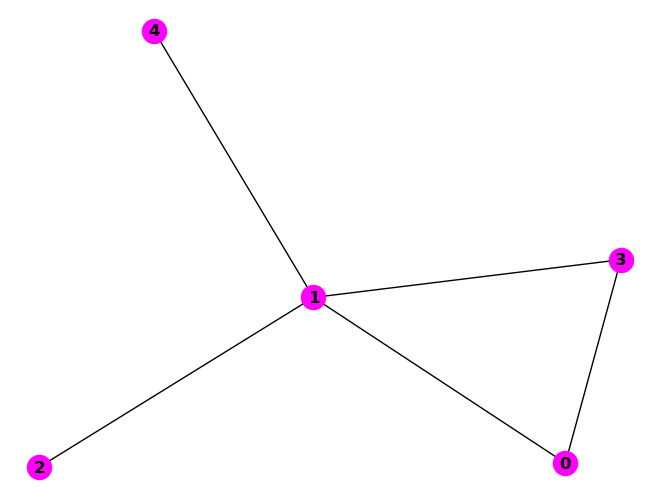

In [32]:
# We build a triangulation of the letter R

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,3])
simpcomplex.insert([0,3])
simpcomplex.insert([1,2])
simpcomplex.insert([1,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter S

The simplicial complex has Euler characteristic equal to 1.


1

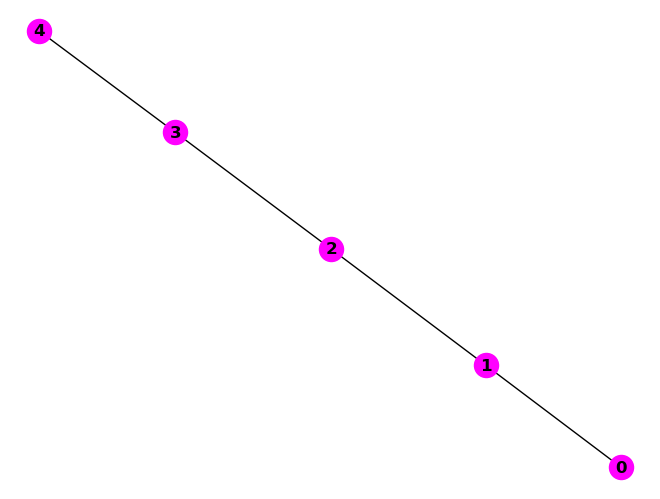

In [33]:
# We build a triangulation of the letter S

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,3])
simpcomplex.insert([3,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter T

The simplicial complex has Euler characteristic equal to 1.


1

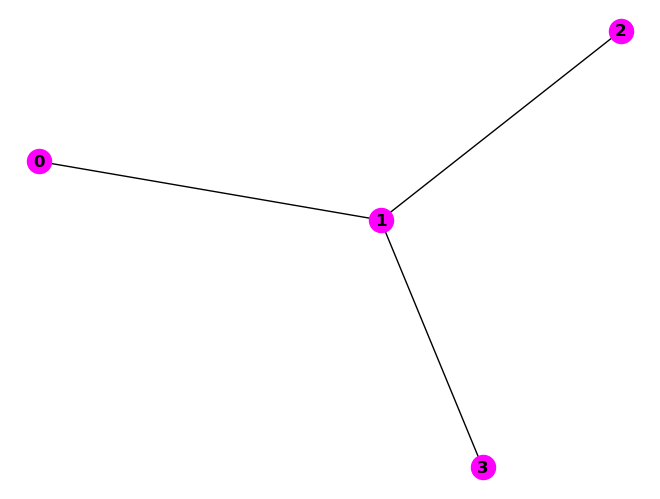

In [34]:
# We build a triangulation of the letter T

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([1,3])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter U

The simplicial complex has Euler characteristic equal to 1.


1

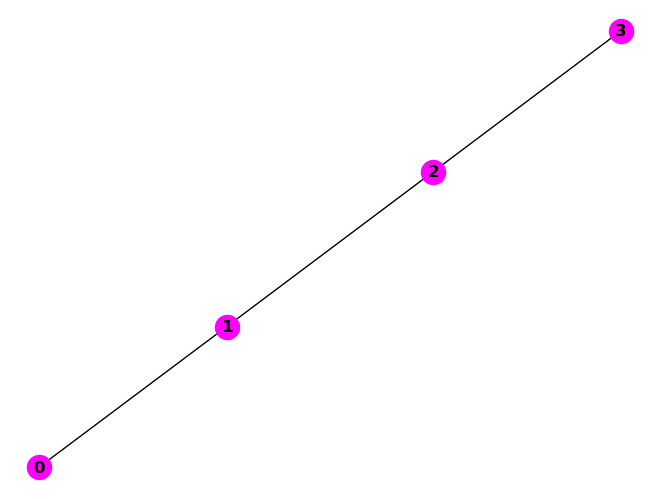

In [35]:
# We build a triangulation of the letter U

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,3])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter V

The simplicial complex has Euler characteristic equal to 1.


1

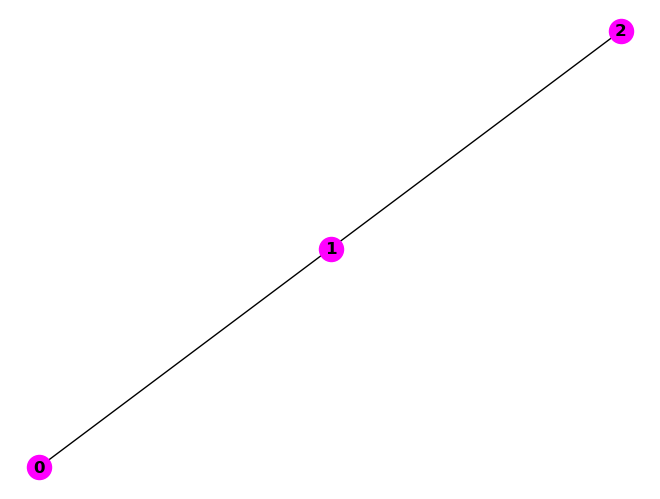

In [36]:
# We build a triangulation of the letter V

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter W

The simplicial complex has Euler characteristic equal to 1.


1

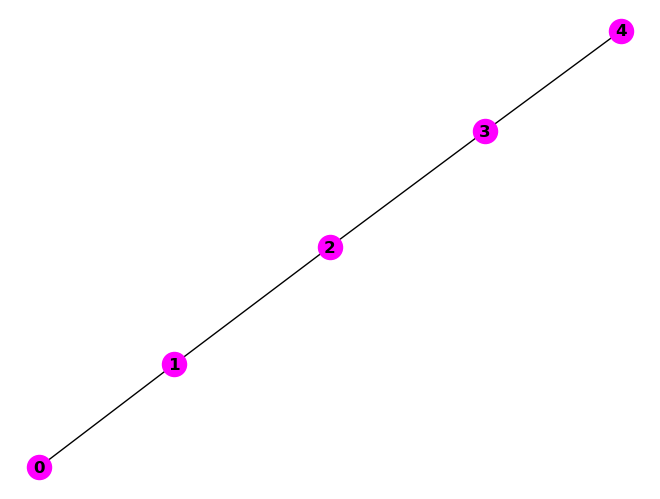

In [37]:
# We build a triangulation of the letter W

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,3])
simpcomplex.insert([3,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter X

The simplicial complex has Euler characteristic equal to 1.


1

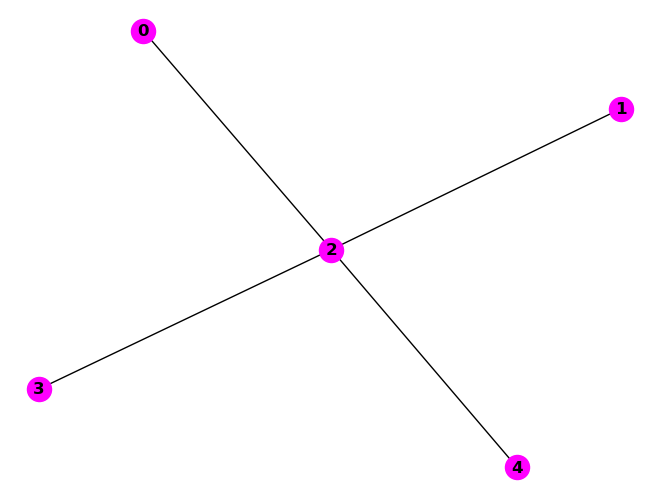

In [38]:
# We build a triangulation of the letter X

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,2])
simpcomplex.insert([2,1])
simpcomplex.insert([2,3])
simpcomplex.insert([2,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter Y

The simplicial complex has Euler characteristic equal to 1.


1

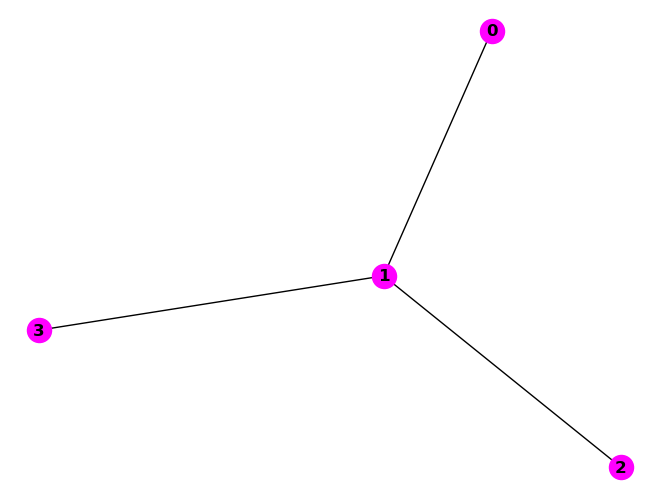

In [39]:
# We build a triangulation of the letter Y

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([1,3])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Triangulation of letter Z

The simplicial complex has Euler characteristic equal to 1.


1

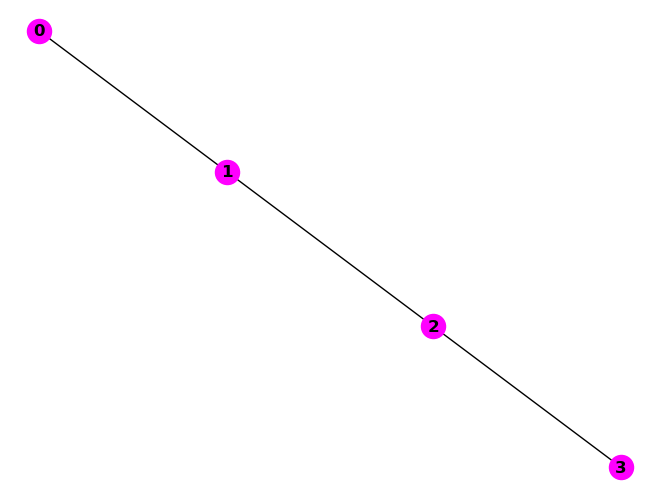

In [40]:
# We build a triangulation of the letter Z

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,3])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

 ## Observation
 
 Based on the Euler characteristics that we have calculated below we can observe that 
 
  - The following letters are homotopy because their euler characteristics give us the value 0: A-B-D-O-Q-R
  - The rest of the letters of the alphabet are also homotopy because their Euler characteristics give the value 1: A-E-F-G-H-I-J-K-L-M-N-P-S-T-U-V-W-X-Y-Z
  - {A, R}, {B}, {C,G, I, J, L, M, N, S, U. V, W, Z}, {D,O}, {E, F, T, Y}, {H, K}, {P}, {Q}, {X} are grouped according to homoemorphism class. 
  - The letter A D O P Q R are homotopy to $S^1$
  - The letter C E F G H I J K M N S T U V W X Y and Z are contractible. The letter B is neither contractible. The letter B is neither contractible nor homotopy equivalent to $S^1$

# Exercise 23

For every $n$, triangulate the bouquet of $n$ circles. Compute their Euler characteristic. 

The simplicial complex has Euler characteristic equal to -9.


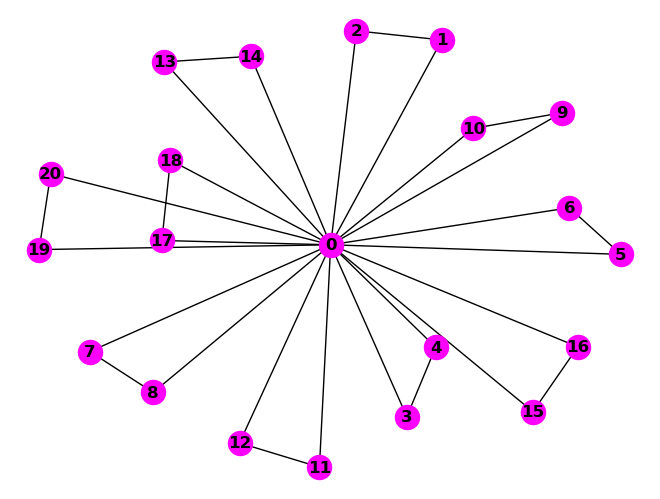

In [9]:
def EulerCharacteristicBouquetOfCircles(n):
    '''
    Compute and print the Euler characteristic of the bouquet of n circles.
    
    Input:
        n: Number of circles in the bouquet
        
    Example:
        EulerCharacteristicBouquetOfCircles(5)
    '''
    simpcomplex = gudhi.SimplexTree()
    f = 0
    for i in range(1, 2*n+1):
        simpcomplex.insert([0, i])
        if f == 2 or f==0:
            f = 0 ## this help us to reset
            simpcomplex.insert([i, i+1])
        f+=1
    DrawSimplicialComplex(simpcomplex)
    EulerCharacteristic(simpcomplex)

    ## euler characteritic of bouquet of 10 circles
EulerCharacteristicBouquetOfCircles(10)

The simplicial complex has Euler characteristic equal to -19.


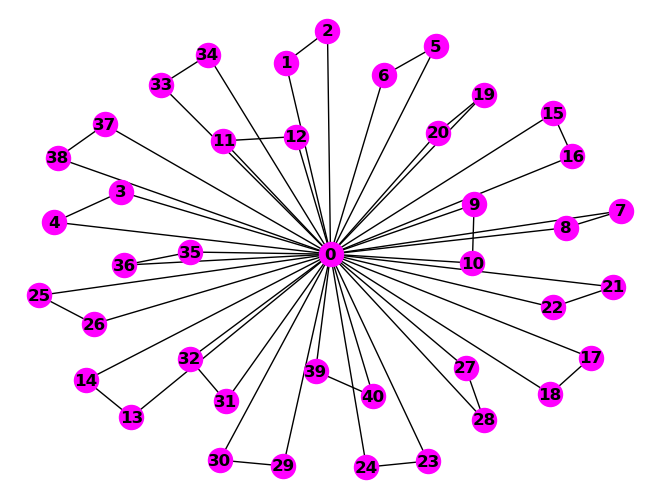

In [10]:
## euler characteritic of bouquet of 20 circles
EulerCharacteristicBouquetOfCircles(20)

The simplicial complex has Euler characteristic equal to -99.


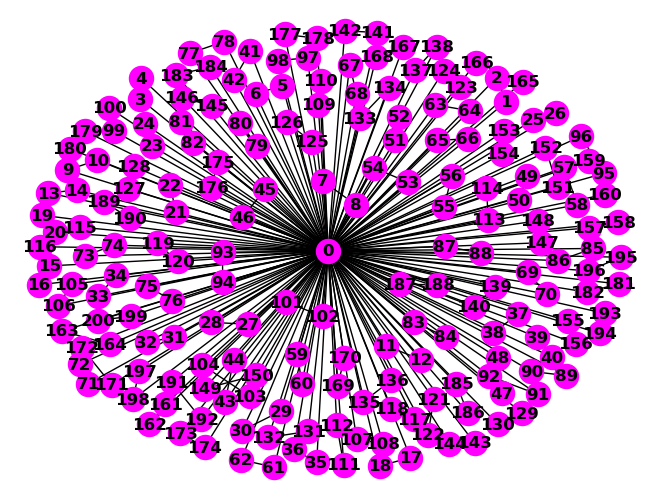

In [11]:
## euler characteritic of bouquet of 100 circles 
EulerCharacteristicBouquetOfCircles(100)

The simplicial complex has Euler characteristic equal to -199.


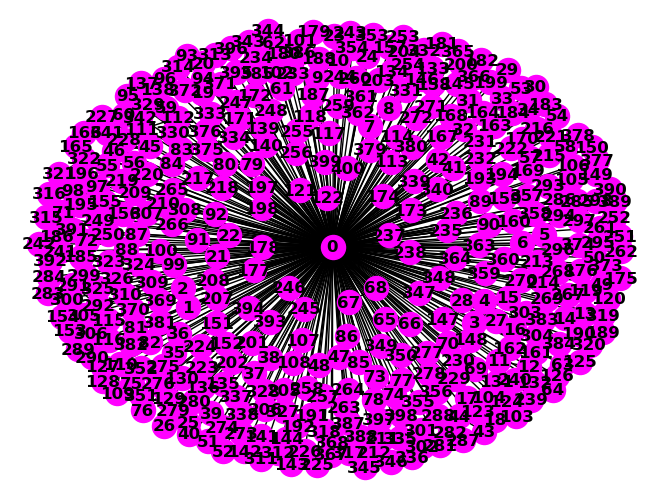

In [15]:
## euler characteritic of bouquet of 200 circles 
EulerCharacteristicBouquetOfCircles(200)

# Exercise 24

Implement the triangulation of the torus given in the notes.
Compute its Euler characteristic.

The simplicial complex has Euler characteristic equal to 0.


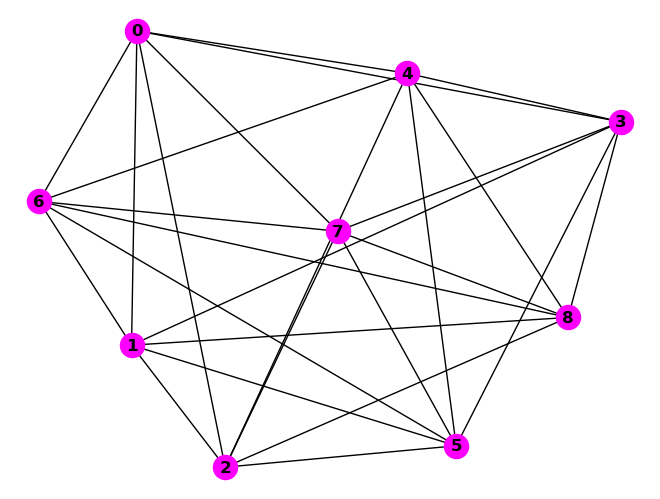

In [12]:
def EulerCharacteristicTorus():
    '''
    Compute and print the Euler characteristic of the triangulation of a torus.
    The triangulation is minimal, with 2 vertices, 3 edges, and 2 faces.
    '''
    
    simpcomplex = gudhi.SimplexTree()
    
    simpcomplex.insert([0, 3 , 1])
    simpcomplex.insert([1, 3 , 5])
    simpcomplex.insert([1, 2 , 5])
    simpcomplex.insert([2, 5 , 7])
    simpcomplex.insert([2, 0 , 7])
    simpcomplex.insert([0, 7 , 3])
    simpcomplex.insert([3, 4 , 5])
    simpcomplex.insert([5, 4 , 6])
    simpcomplex.insert([5, 7 , 6])
    simpcomplex.insert([7, 6 , 8])
    simpcomplex.insert([7, 8 , 3])
    simpcomplex.insert([3, 8 , 4])
    simpcomplex.insert([4, 0 , 6])
    simpcomplex.insert([6, 0 , 1])
    simpcomplex.insert([6, 1 , 8])
    simpcomplex.insert([8, 1 , 2])
    simpcomplex.insert([8, 2 , 4])
    simpcomplex.insert([4, 2 , 0])
    
    
    
    DrawSimplicialComplex(simpcomplex)
    EulerCharacteristic(simpcomplex)


EulerCharacteristicTorus()

# Exercise 25

Consider the following dataset of $30$ points $x_0, ..., x_{29}$ in $\mathbb{R}^2$:
 ``` 
 {0: [0.29409772548731694, 0.6646626625013836],
 1: [0.01625840776679577, 0.1676405753593595],
 2: [0.15988905150272759, 0.6411323760808338],
 3: [0.9073191075894482, -0.16417982219713312],
 4: [-0.18661467838673884, 0.31618948583046413],
 5: [-0.3664040542098381, 0.9098590694955988],
 6: [-0.43753448716144905, -0.8820102274699417],
 7: [0.4096730199915961, -0.23801426675264126],
 8: [0.5903822103474676, -0.7285102954232894],
 9: [0.9133851839417766, -0.6606557328320093],
 10: [-0.15516122940597588, 0.7565411235103017],
 11: [-0.38626186295039866, -0.3662321656058476],
 12: [0.005209710070218199, 0.27655964872153116],
 13: [0.670078068894711, -0.00932202688834849],
 14: [-0.011268465716772091, 0.24340880308017376],
 15: [-0.6441978411451603, -0.9672635759413206],
 16: [-0.2841794022401025, -0.6734801188906114],
 17: [-0.15473260248990717, -0.1365357396855129],
 18: [0.7177096105982121, 0.9378197891592468],
 19: [-0.4677068504994166, 0.1533930130294956],
 20: [-0.32379909116817096, 0.9694800649768063],
 21: [-0.2886940472879451, -0.039544695812395725],
 22: [-0.5900701743351606, 0.8350804500575086],
 23: [0.14931959728335853, 0.869106793774487],
 24: [-0.14500672678238824, -0.3170082291070364],
 25: [0.07324547392476122, 0.6653572287065117],
 26: [-0.662990048258566, 0.1908198608241125],
 27: [-0.25641262456436276, -0.9844196180941553],
 28: [-0.5105685407819842, -0.4236604017060557],
 29: [0.6792549581008038, -0.026215820387260003]}
 ``` 
 
 Write a function that takes as an input a parameter $r\geq 0$, and returns the simplicial complex $\mathcal{G}(r)$ defined as follows:
- the vertices of $\mathcal{G}(r)$ are the points $x_0, ..., x_{29}$,
- for all $i, j \in [0,29]$ with $i\neq j$, the edge $[i,j]$ belongs to $\mathcal{G}(r)$ if and only if $||x_i-x_j||\leq r$.

Compute the number of connected components of $\mathcal{G}(r)$ for several values of $r$. What do you observe



Text(0.5, 1.0, 'Number of connected component vs value of R')

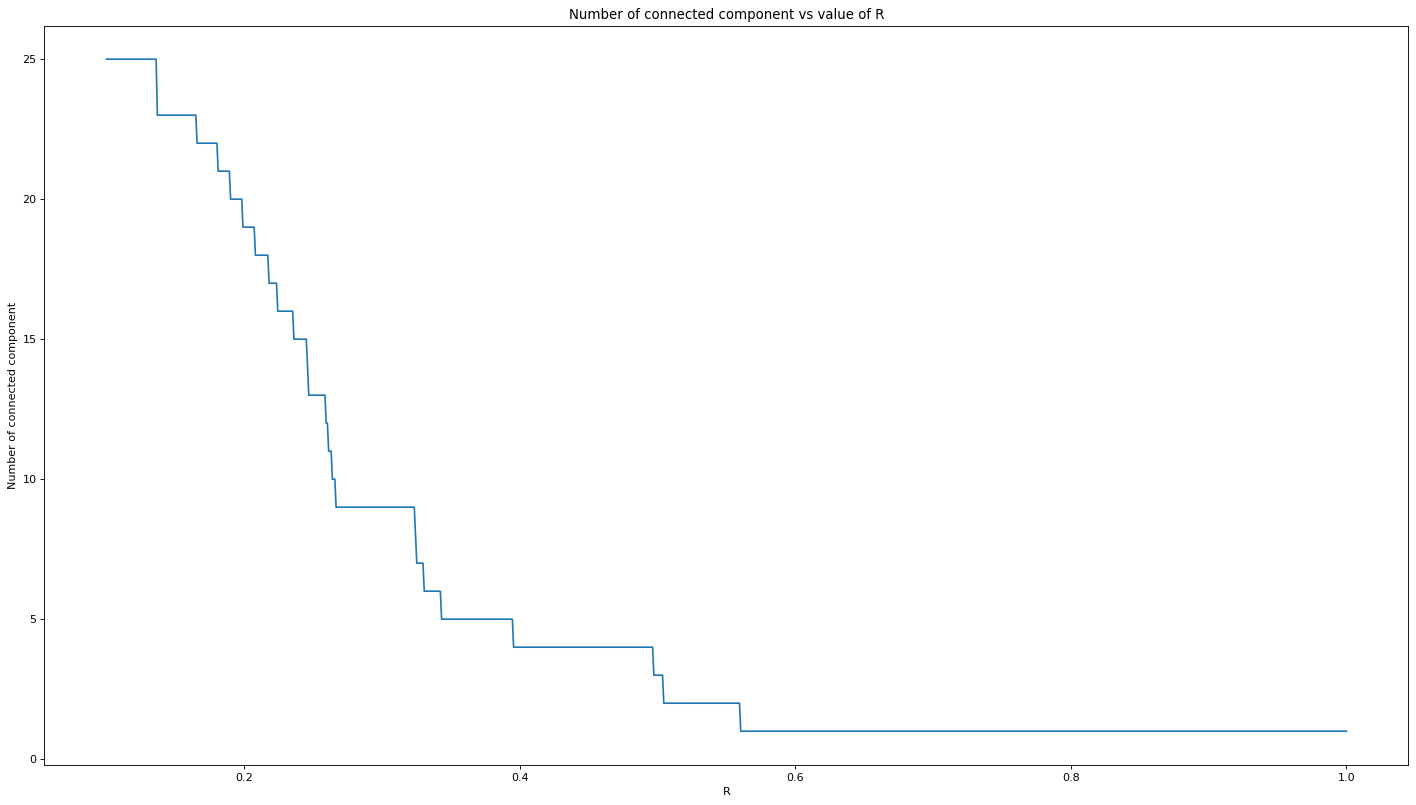

In [13]:
from itertools import combinations
import numpy
import matplotlib.pyplot as plt
from math import sqrt
dataset = {
    0: [0.29409772548731694, 0.6646626625013836],
    1: [0.01625840776679577, 0.1676405753593595],
    2: [0.15988905150272759, 0.6411323760808338],
    3: [0.9073191075894482, -0.16417982219713312],
    4: [-0.18661467838673884, 0.31618948583046413],
    5: [-0.3664040542098381, 0.9098590694955988],
    6: [-0.43753448716144905, -0.8820102274699417],
    7: [0.4096730199915961, -0.23801426675264126],
    8: [0.5903822103474676, -0.7285102954232894],
    9: [0.9133851839417766, -0.6606557328320093],
    10: [-0.15516122940597588, 0.7565411235103017],
    11: [-0.38626186295039866, -0.3662321656058476],
    12: [0.005209710070218199, 0.27655964872153116],
    13: [0.670078068894711, -0.00932202688834849],
    14: [-0.011268465716772091, 0.24340880308017376],
    15: [-0.6441978411451603, -0.9672635759413206],
    16: [-0.2841794022401025, -0.6734801188906114],
    17: [-0.15473260248990717, -0.1365357396855129],
    18: [0.7177096105982121, 0.9378197891592468],
    19: [-0.4677068504994166, 0.1533930130294956],
    20: [-0.32379909116817096, 0.9694800649768063],
    21: [-0.2886940472879451, -0.039544695812395725],
    22: [-0.5900701743351606, 0.8350804500575086],
    23: [0.14931959728335853, 0.869106793774487],
    24: [-0.14500672678238824, -0.3170082291070364],
    25: [0.07324547392476122, 0.6653572287065117],
    26: [-0.662990048258566, 0.1908198608241125],
    27: [-0.25641262456436276, -0.9844196180941553],
    28: [-0.5105685407819842, -0.4236604017060557],
    29: [0.6792549581008038, -0.026215820387260003]
}

def norm(x, y):
    """
    The propulse of this function is to calculate the distance between two points
    """
    return sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)


def custun_implementation_of_simplicat_simplex(data, r: int):
    simpcomplex = gudhi.SimplexTree()
    for e_1, e_2 in combinations(list(data.keys()), 2):
        simpcomplex.insert([e_1])
        if norm(data[e_1], data[e_2]) <= r:
            simpcomplex.insert([e_1, e_2])
            
    #DrawSimplicialComplex(simpcomplex)
    #EulerCharacteristic(simpcomplex)
    return simpcomplex


### computer the number of connected component for all value of r
### plot te graphique

data = numpy.linspace(0.1, 1, 1000)
plt.figure(figsize=(22, 12), dpi=80)
plt.plot(data, [NumberOfConnectedComponents(custun_implementation_of_simplicat_simplex(dataset, i)) for i in data])
plt.xlabel("R")
plt.ylabel("Number of connected component")
plt.title("Number of connected component vs value of R")

## Observation 

The figure above shows us that the number of connected components decreases over time. When the radius between two points is greater than 0.56 the number of connected components stabilizes and becomes constant.

# Exercise 26

A *Erdős–Rényi random graph $\mathcal{G}(n,p)$* is a simplicial complex obtained as follows:
- add $n$ vertices $1,...,n$,
- add each edge $[a,b]$, where $a,b \in [1,n]$, to the complex with probability $p$.

Builds a function that, given $n$ and $p$, outputs a simplicial complex $\mathcal{G}(n,p)$.
Observe the influence of $p$ on the number of connected components of $\mathcal{G}(10,p)$ and $\mathcal{G}(100,p)$.

*Hint:* If $V$ is a list, `itertools.combinations(V,2)` can be used to generate all the non-ordered pairs `[a,b]` in `V` (package `itertools`).
The command `random.random()` can be used to generate a random number between 0 and 1, and `random.random()<p` is  `True` with probability  `p` (package `random`).

Text(0.5, 1.0, 'Number of connected component vs value of p')

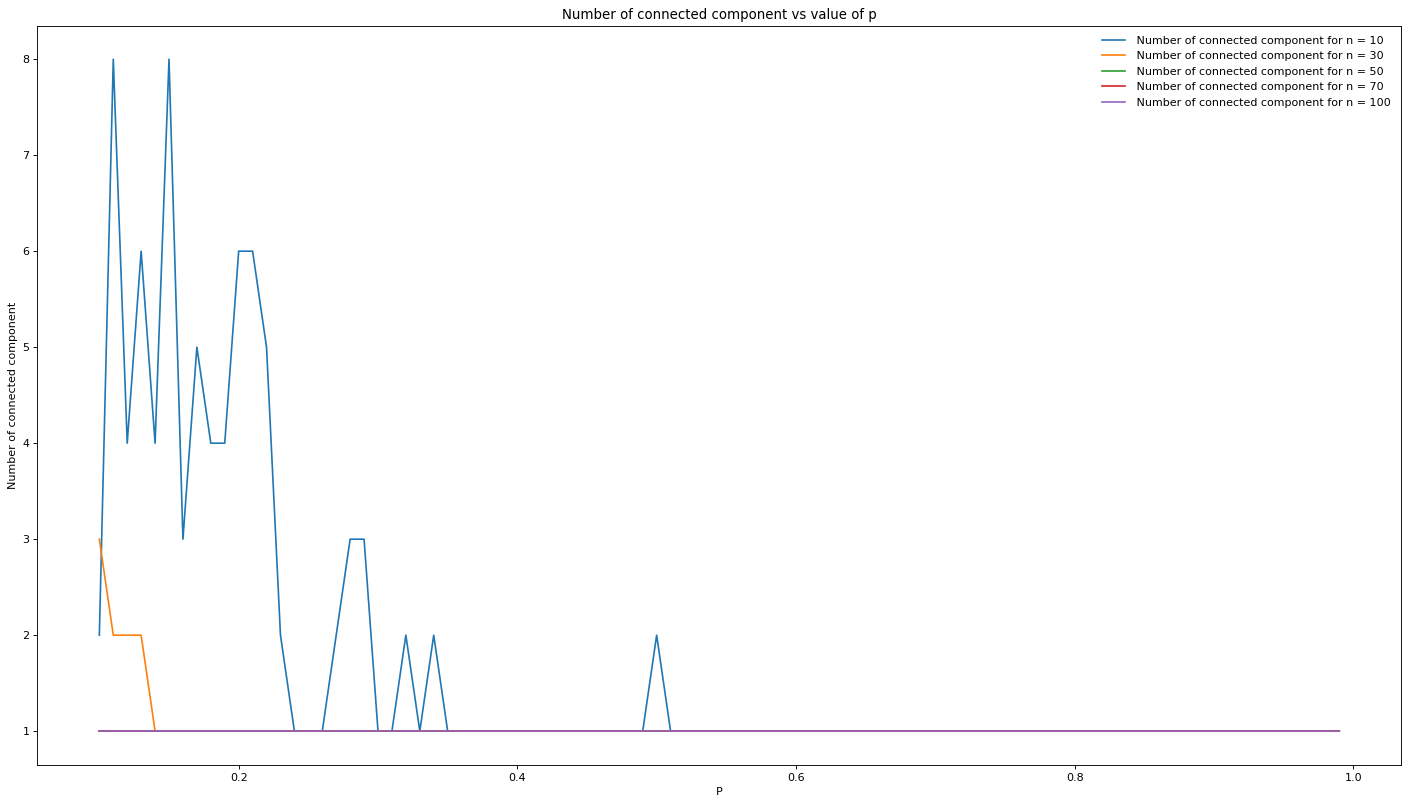

In [14]:
from itertools import combinations
import random
import numpy
import matplotlib.pyplot as plt

def function_exercise_26(n, p):
    list_of_point_vertices = [i for i in range(1,n)]
    simpcomplex = gudhi.SimplexTree()
    for v in list_of_point_vertices:
        simpcomplex.insert([v])
    for e_1, e_2 in combinations(list_of_point_vertices, 2):
        if random.random() < p:
            simpcomplex.insert([e_1, e_2])
    return simpcomplex

data = numpy.arange(0.1, 1, 0.01)
plt.figure(figsize=(22, 12), dpi=80)
plt.plot(data, [NumberOfConnectedComponents(function_exercise_26(10, p)) for p in data], label = " Number of connected component for n = 10")
plt.plot(data, [NumberOfConnectedComponents(function_exercise_26(30, p)) for p in data], label = " Number of connected component for n = 30")
plt.plot(data, [NumberOfConnectedComponents(function_exercise_26(50, p)) for p in data], label = " Number of connected component for n = 50")
plt.plot(data, [NumberOfConnectedComponents(function_exercise_26(70, p)) for p in data], label = " Number of connected component for n = 70")
plt.plot(data, [NumberOfConnectedComponents(function_exercise_26(100, p)) for p in data], label = " Number of connected component for n = 100")
plt.xlabel("P")
plt.legend()
plt.legend(frameon=False)
plt.ylabel("Number of connected component")
plt.title("Number of connected component vs value of p")

### Interpretation
In order to interpret our result well, we need to investigate the number of values n. We just change progressively (increase) to capture the behavior of the number of connected components.
 - we can see that when n=10 the number of connected components is very big when the probability is less than 0.4 and the number of connected components is almost 1 when the probability is greater than 0.4.
 - when n=100, whatever the probability the number of connected components is always 1.